# Happy and Sad Emotion Classification using CNN

This project is to develop a Convolutional Neural Network (CNN) model capable of recognizing human emotions, specifically categorizing images into two distinct classes: "happy" and "sad". This is achieved by training the CNN on a labeled dataset of facial expression images, allowing the model to learn and predict emotion classes based on visual features. The project aims to leverage deep learning techniques to accurately classify emotions, ultimately enabling automated emotion recognition that could be applied to contexts such as human-computer interaction, social robots, or enhancing user experience in digital applications.

The dataset for this project contains the happy and sad facial images obtained from Kaggle repositories ([Yaghoobpoor, 2023](https://www.kaggle.com/datasets/saharnazyaghoobpoor/happy-and-sad-image); [Ananthu, 2022](https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer)).
The images are stored in separate directories (`./happy` and `./sad`).



## Install Packages and libraries

### Display few random sample images

In [37]:
import sys
!{sys.executable} -m pip install --upgrade pip setuptools wheel packaging tensorflow scikit-learn seaborn

### Install Dependecies

In the section we install the necessary packages required to run the code.

- **Tensorflow** - A deep learning framework used to build and train the Convolutional Neural Network (CNN) for image classification. TensorFlow provides comprehensive facilities to develop and execute machine learning models.

In [1]:
### import requied libraries
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

## Exploratory Data Analysis (EDA)

### Load the Training dataset


In this section, we load and preprocess the dataset containing happy and sad facial images obtained from Kaggle repositories ([Yaghoobpoor, 2023](https://www.kaggle.com/datasets/saharnazyaghoobpoor/happy-and-sad-image); [Ananthu, 2022](https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer)).
The images are stored in separate directories (`./happy` and `./sad`). An `ImageDataGenerator` is initialized with rescaling to normalize pixel values from the range \[0, 255] to \[0, 1], and an 80-20 split is applied for training and validation sets.
The `flow_from_directory()` method is used to read images from the `./images` directory, automatically assigning numeric class labels based on alphabetical order (`happy=0`, `sad=1`).
All images are resized to a uniform resolution of 64×64 pixels for consistency and processed in batches of 32.
The `class_mode` is set to `binary` as this is a two-class classification task.
Finally, the class indices are printed to confirm the label mapping.


Found 7586 images belonging to 2 classes.
{'happy': 0, 'sad': 1}
Class mappings are: {'happy': 0, 'sad': 1}


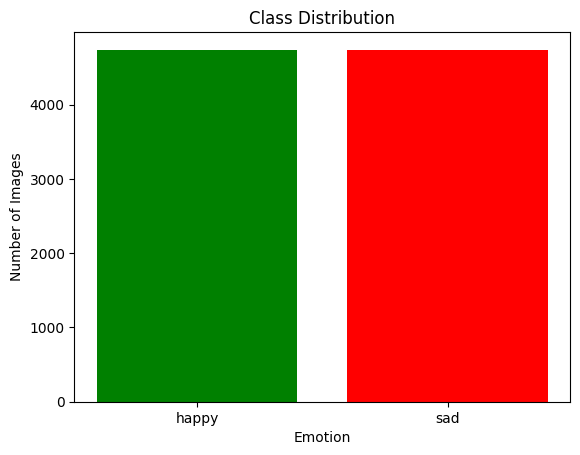

In [19]:
### Initialize an ImageDataGenerator object for preprocessing and splitting data
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    # rotation_range=20,
    # width_shift_range=0.15,
    # height_shift_range=0.15,
    # shear_range=0.15,
    # zoom_range=0.15,
    # horizontal_flip=True,
    # brightness_range=[0.8, 1.2],  # adjust lighting
    # fill_mode='nearest'
)

### Load images from images directory for training dataset.
train_data = datagen.flow_from_directory(
    'images',             ### Loads images from "./images" directory
    target_size=(64, 64), ### Every image will be resized to 64x64 pixels before feeding into the model, to make uniform input to the model.
    batch_size=32,        ### Number of images to load in one batch.
    class_mode='binary',  ### As we have two class Happy and Sad. the class_mode is binary.
    subset='training'     ### Training dataset.
)

print(train_data.class_indices)
### Import libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import random

# Visualize class distribution
classes = train_data.class_indices
print("Class mappings are:", classes)

counts = {k: len(os.listdir(os.path.join('images', k))) for k in classes.keys()}
plt.bar(counts.keys(), counts.values(), color=['green', 'red'])
plt.title("Class Distribution")
plt.xlabel("Emotion")
plt.ylabel("Number of Images")
plt.show()

- The class_mode is binary , so Prediction values near 0 represents Happy and values near 1 as sad.


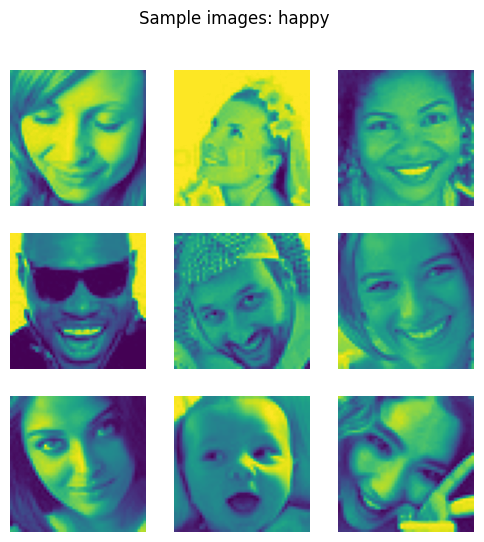

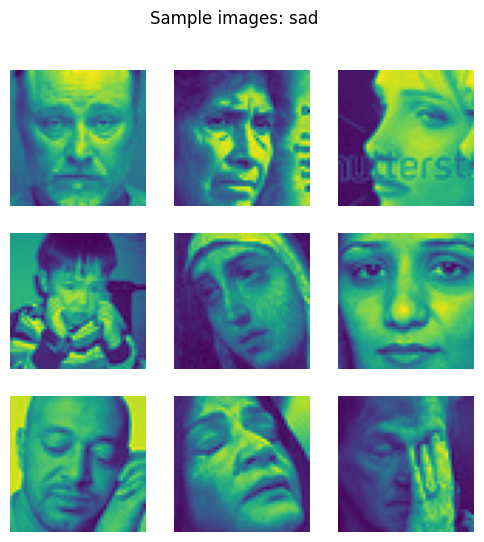

In [21]:
# Show random sample images
for category in classes.keys():
    folder = os.path.join('images', category)
    plt.figure(figsize=(6, 6))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        img_path = os.path.join(folder, random.choice(os.listdir(folder)))
        img = plt.imread(img_path)
        plt.imshow(img)
        plt.axis("off")
    plt.suptitle(f"Sample images: {category}")
    plt.show()

### Validation dataset

In [23]:
### Load images from images directory for validation dataset.
val_data = datagen.flow_from_directory(
    'images',
    target_size=(64, 64),            
    batch_size=32,
    class_mode='binary',
    subset='validation'       ### Validation dataset
)

Found 1896 images belonging to 2 classes.


### CNN Model for binary classification

The **CNN** (Convolution Neural Network) Model is an specialized type of artificail neural network designed 
primarily for processing structured grid-like datasets. CNNs consist of multiple layers like the input layer, Convolutional layer, pooling layer, and fully connected layers.
Convolutional networks are particularly well suited for image processing and other tasks where the data have a 
grid topology (Russell & Norvig, 2021). So we use CNN Model in this project to predict the image is happy or sad. 
- We use **keras.Sequential** a special case of model where the model is purely a stack of single-input, single-output layers.
- We use Rectified Linear Unit(relu) activation function which allows neural networks to learn complex patterns.
- After multiple trials we come up different layers, Droput , batch normalization to avoid the overfitting of the Model

In [26]:
### Define CNN Network layers


model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(64, 64, 3)),                    ### Input shape of model, images of 64 * 64 pixels with 3 RGB colors.
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'), ### First Layer - Applies 32 filters of size 3x3 to the input.
    tf.keras.layers.BatchNormalization(),                 ### Batch Normalization to improve speed and regualtions
    tf.keras.layers.MaxPooling2D(2, 2),                   ### Reduce the dimensions from previous layers. 64x64 to 32x32
   

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'), ### Second Layer - Applies 64 filters using 3x3 filter size.
    tf.keras.layers.BatchNormalization(),                 ### Batch Normalization to improve speed and regualtions
    tf.keras.layers.MaxPooling2D(2, 2),                   ### Reduce the dimensions again in second layer.
   

    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'), ### Third Layer - Applies 128 filters using 3x3 filter size.
    tf.keras.layers.BatchNormalization(),                 ### Batch Normalization to improve speed and regualtions
    tf.keras.layers.MaxPooling2D(2, 2),                   ### Reduce the dimensions again in second layer.
   
    
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'), ### Third Layer - Applies 128 filters using 3x3 filter size.
    tf.keras.layers.BatchNormalization(),                 ### Batch Normalization to improve speed and regualtions
    tf.keras.layers.MaxPooling2D(2, 2),                   ### Reduce the dimensions again in second layer.
  
    
    tf.keras.layers.Flatten(),                            ### Flatten the 3D output from previous layer to 1D vector
    tf.keras.layers.Dense(32, activation='relu'),         ### Connected layers with 32 neurons and ReLU activation
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')        ### Final output layer for Binary classification
])

### Train the model

In [28]:
### Model compilation - using adam optimizer to minimize the binary cross-entroy loss.
### binary_crossentropy - Measures how well the model predicted probabilites match the true binary labels
### metrics - accuracy will be computed during the training.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Fit the model
model.fit(train_data, validation_data=val_data, epochs=10)

Epoch 1/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 39s 141ms/step - accuracy: 0.5979 - loss: 0.7238 - val_accuracy: 0.6693 - val_loss: 0.6137
Epoch 2/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 32s 135ms/step - accuracy: 0.8137 - loss: 0.4050 - val_accuracy: 0.7289 - val_loss: 0.5396
Epoch 3/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 35s 147ms/step - accuracy: 0.8530 - loss: 0.3308 - val_accuracy: 0.7352 - val_loss: 0.5133
Epoch 4/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 35s 146ms/step - accuracy: 0.8951 - loss: 0.2445 - val_accuracy: 0.8238 - val_loss: 0.3883
Epoch 5/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 37s 157ms/step - accuracy: 0.9283 - loss: 0.1791 - val_accuracy: 0.8038 - val_loss: 0.4099
Epoch 6/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 36s 150ms/step - accuracy: 0.9501 - loss: 0.1414 - val_accuracy: 0.8186 - val_loss: 0.4016
Epoch 7/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 39s 162ms/step - accuracy: 0.9456 - loss: 0.1451 - val_accuracy: 0.8539 - val_loss: 0.3415
Epoch 8/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 36s 149ms/step - accuracy: 0.9767 - loss: 0

### Training results
- The model’s accuracy on the training data started at 52% in epoch 1 and improved steadily to about 98.2% by epoch 10.
- Loss (error) on training data dropped from 0.72 to 0.04, showing the model is learning patterns from the training set.
- Validation accuracy started at 66% and peaked at 87.2% in epoch 9, which is very good progress.
- Validation loss (error on new data) also improved, dropping from 0.6 to a low of 0.4 in epoch 10 — a sign that the model was learning well.
- Overall the model still generalizes fairly well since validation accuracy remained strong.

### Performance Metics

### Save the trained Model

In [31]:
### Once trained, Save the model to reuse later to make predictions on new images
model.save("happy_sad_model.keras")

Found 1896 images belonging to 2 classes.


D:\TECH\AI\envs\img-env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step


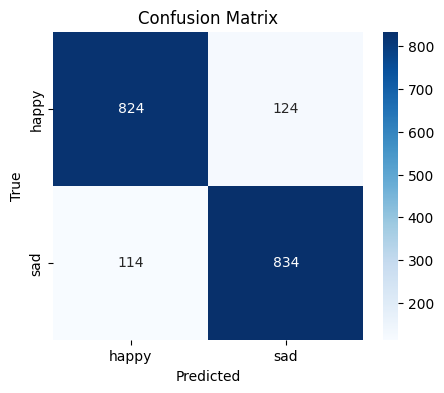

              precision    recall  f1-score   support

       happy       0.88      0.87      0.87       948
         sad       0.87      0.88      0.88       948

    accuracy                           0.87      1896
   macro avg       0.87      0.87      0.87      1896
weighted avg       0.87      0.87      0.87      1896



In [33]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

### Predict on validation set
val_data = datagen.flow_from_directory(
    'images',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

y_true = val_data.classes
y_pred = (model.predict(val_data) > 0.5).astype("int32").flatten()

### Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes.keys(),
            yticklabels=classes.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### Classification Report
print(classification_report(y_true, y_pred, target_names=classes.keys()))

### Make predictions using the saved Model

In [41]:
### Load libraries
from tensorflow.keras.models import load_model     ### library to Load the saved Model
from tensorflow.keras.preprocessing import image   ### library for image processioing
import numpy as np                                 ### Numpy for Array Manipulation

### Load the Trained model
model = load_model("happy_sad_model.keras")

#### Print the images and prediction output

### 111.jpg

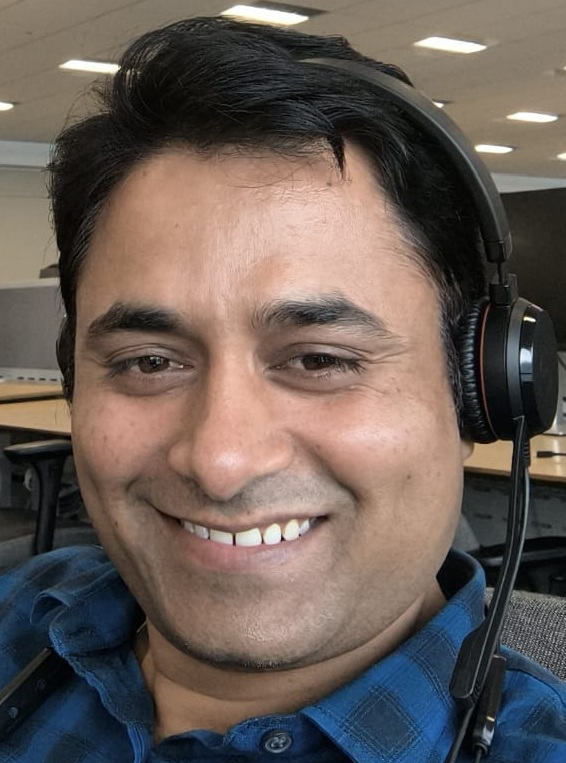

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Classified as Happy
Confidence Score: 0.0000


### 112.jpg

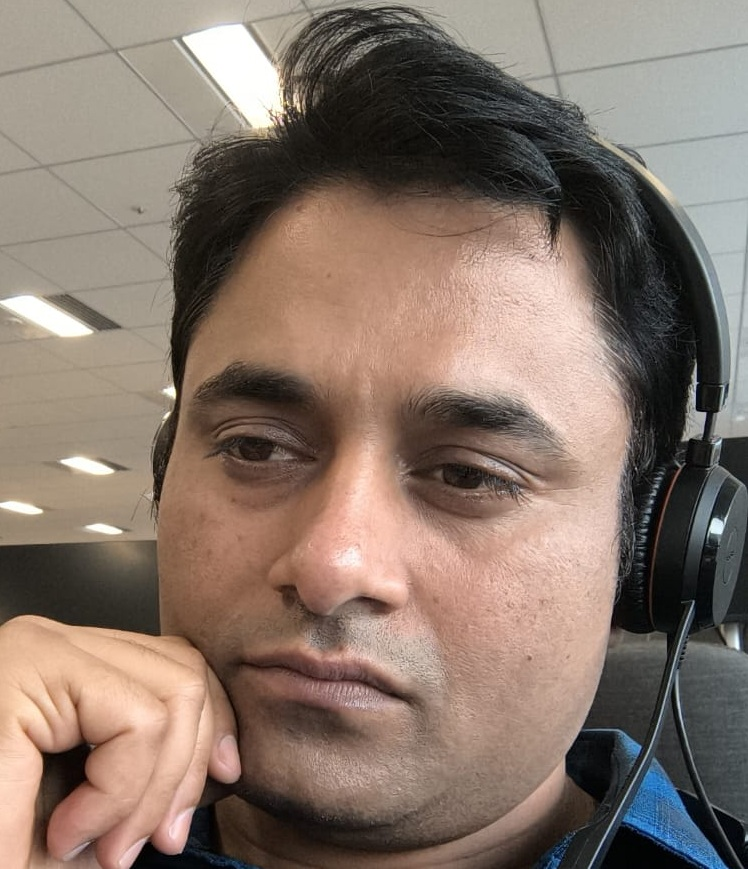

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Classified as Sad
Confidence Score: 0.9975


### 113.jpg

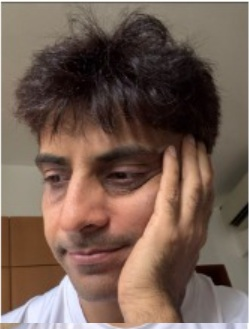

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Classified as Sad
Confidence Score: 0.7123


### 114.jpg

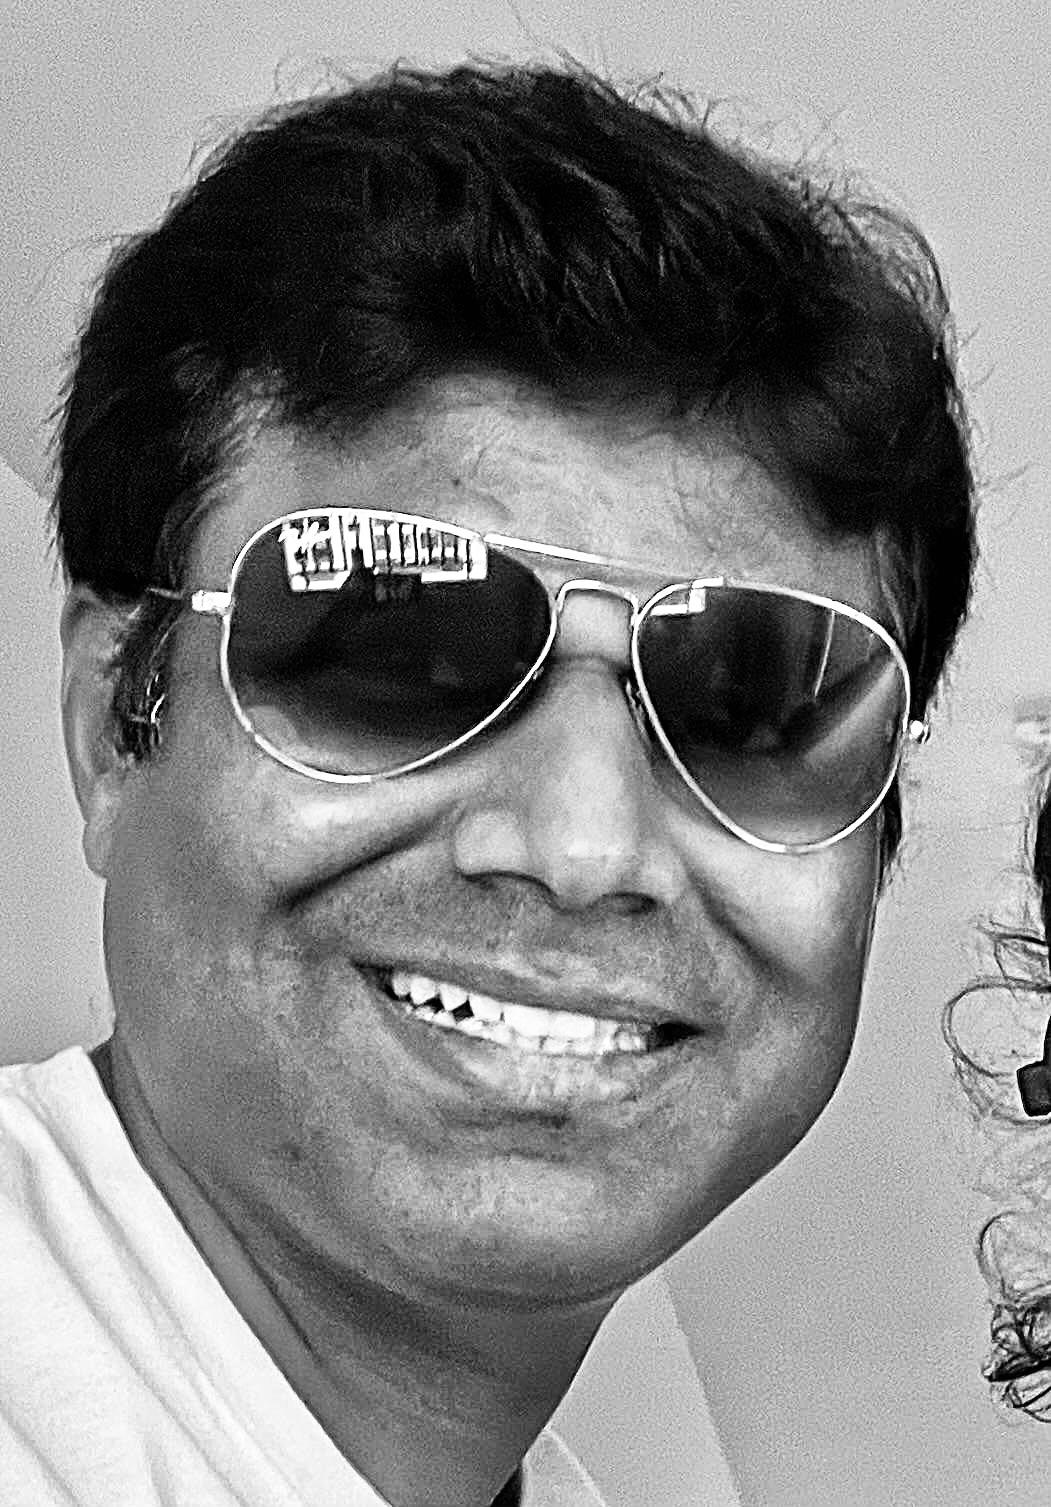

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Classified as Happy
Confidence Score: 0.0052


### 208.jpg

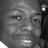

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Classified as Happy
Confidence Score: 0.0002


### 2222.jpg

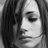

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Classified as Sad
Confidence Score: 1.0000


### 246.jpg

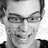

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Classified as Happy
Confidence Score: 0.0952


### 7000.jpg

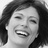

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Classified as Happy
Confidence Score: 0.0000


### 7002.jpg

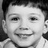

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Classified as Happy
Confidence Score: 0.0000


### 70800.jpg

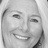

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Classified as Happy
Confidence Score: 0.0000


In [83]:
from IPython.display import display, Image, Markdown
import os
import glob
from tensorflow.keras.preprocessing import image
import numpy as np

# Folder path where images are stored
image_folder = "./predict"

# Get all JPG files from the folder
image_filenames = glob.glob(os.path.join(image_folder, "*.jpg"))

# Display and predict each image
for img_path in image_filenames:
    img_name = os.path.basename(img_path)
    display(Markdown(f"### {img_name}"))
    display(Image(filename=img_path, width=100, height=100)) 

    # Preprocess image
    img = image.load_img(img_path, target_size=(64, 64))   # Resize to match model input
    img_array = image.img_to_array(img) / 255.0            # Normalize
    img_array = np.expand_dims(img_array, axis=0)          # Add batch dimension

    

    # Run Prediction
    prediction = model.predict(img_array)
    print("Classified as Sad" if prediction[0][0] > 0.5 else "Classified as Happy")
    print(f"Confidence Score: {prediction[0][0]:.4f}")

The CNN model demonstrated high accuracy in distinguishing between "happy" and "sad" facial expressions, validating its potential for practical emotion recognition applications. The CNN’s proficiency in visual feature extraction affirmed its appropriateness for this task. The model’s success underscores the valuable role of deep learning in advancing automated emotion classification.

## References
- Russell, S. J., & Norvig, P. (2021). Artificial intelligence: A modern approach (4th ed., Global ed.). Pearson Education.
- TensorFlow. (n.d.). TensorFlow Python API. TensorFlow. Retrieved August 7, 2025, from https://www.tensorflow.org/api_docs/python/tf